# Ejemplo básico: Random Forest con Iris

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [74]:
# En este ejemplo trabajamos con todas las features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# La target sí puede ser categórica, no hace falta transformarla
target = 'species'

X = iris[features].copy()
y = iris[target]

In [75]:
# Dividimos antes de entrenar
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% test
    random_state=42,     # reproducibilidad
    stratify=y           # mantener proporción de clases
)

In [76]:
# Entrenamos sin tener en cuenta hiperparámetros
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Representación del árbol

Representamos los primeros árboles de decisión para ver las variables seleccionadas y las decisiones tomadas

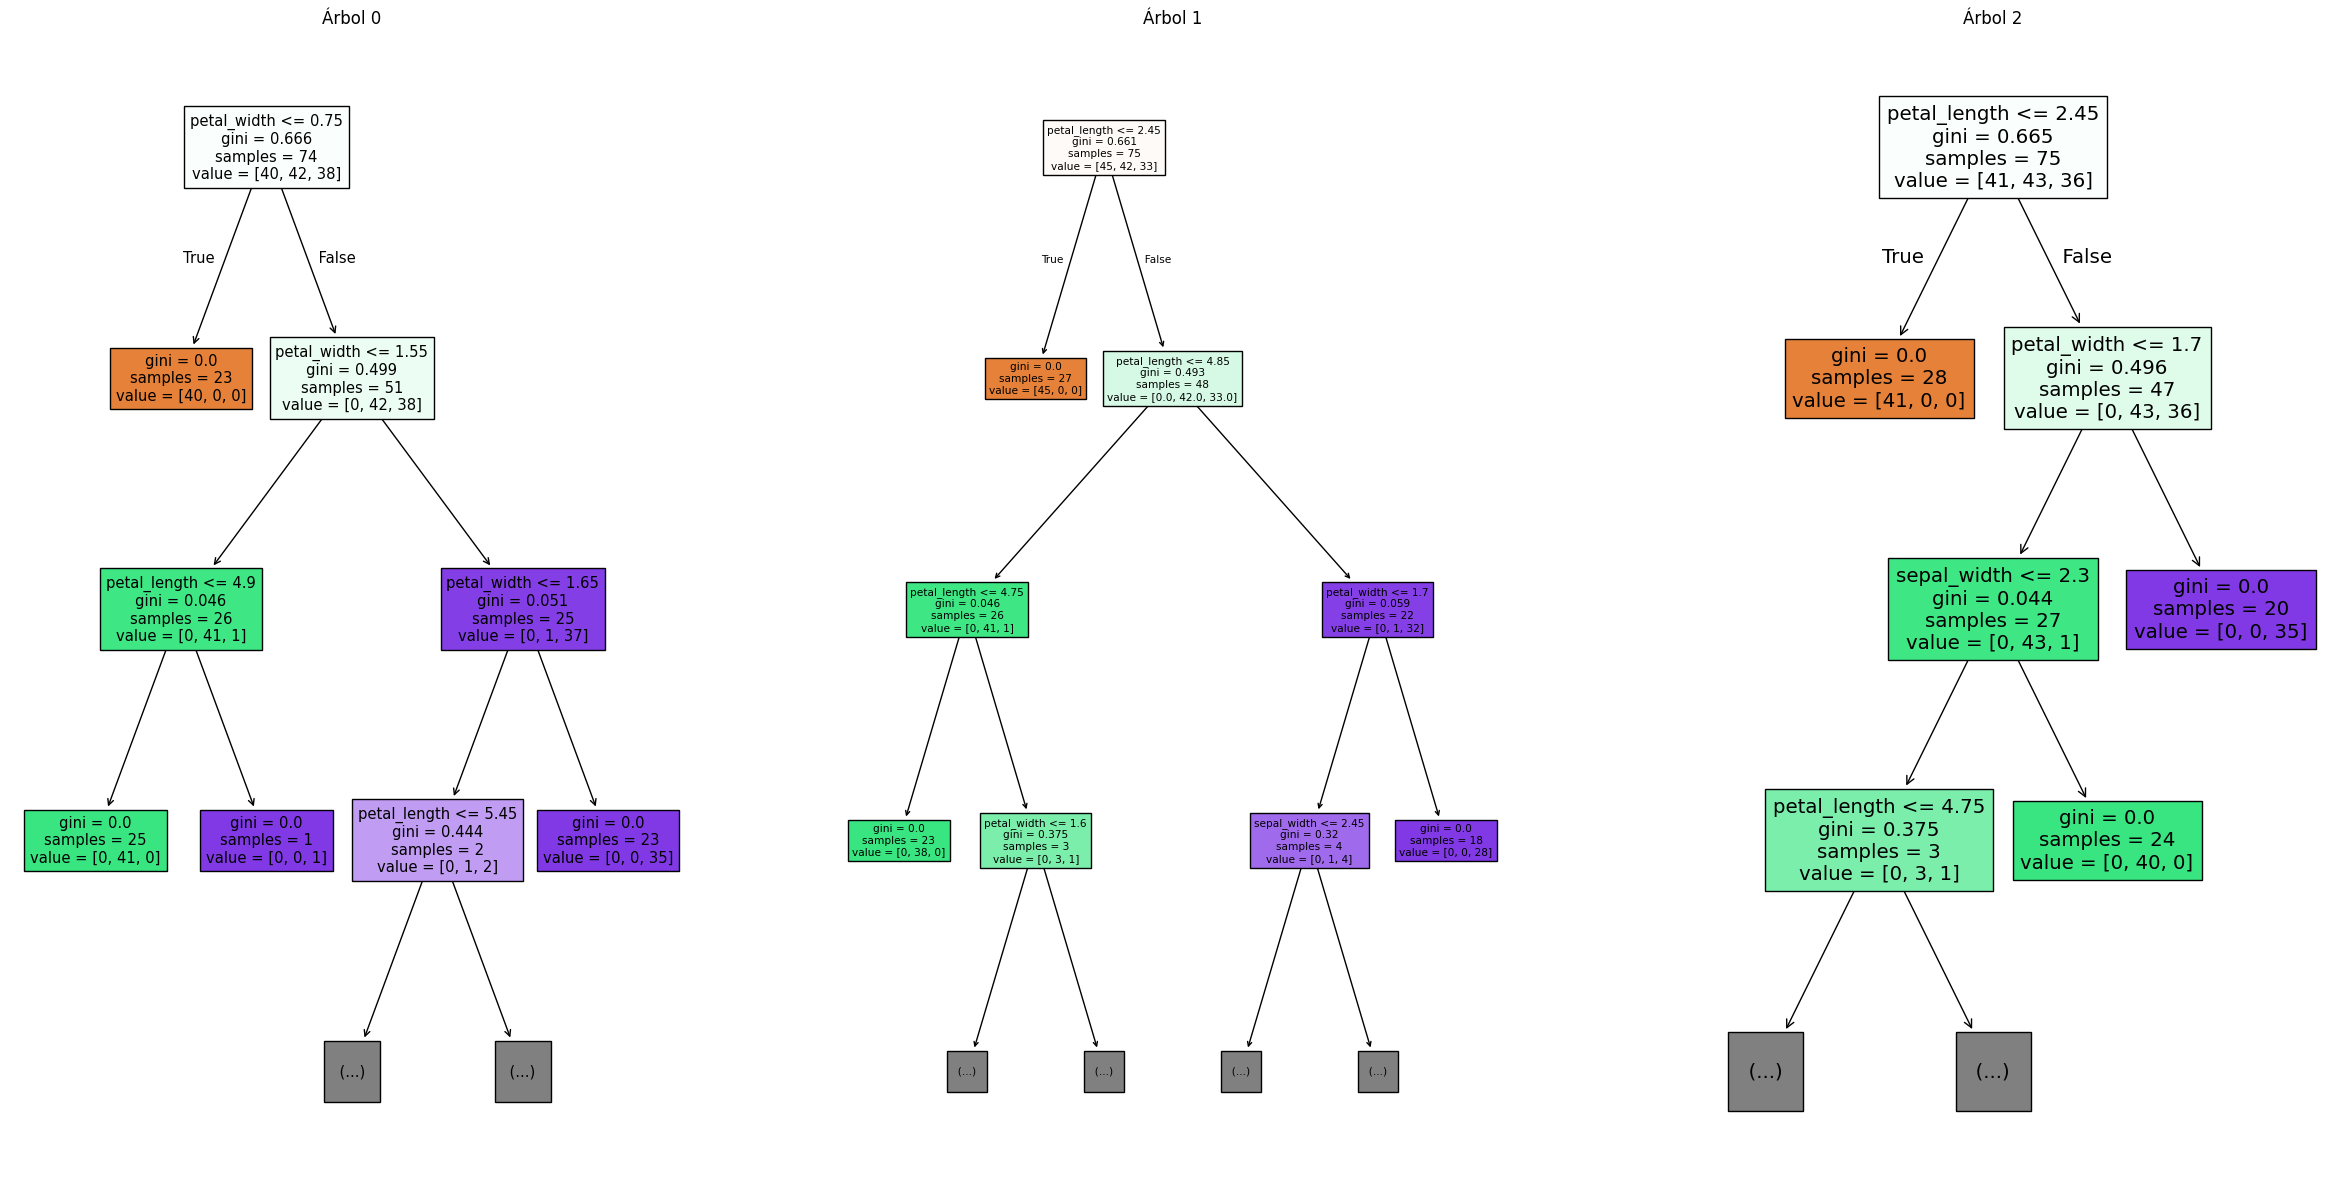

In [77]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
from sklearn import tree

# Creamos una figura con 3 subplots (uno por cada árbol)
plt.figure(figsize=(30, 15))

# Recorremos los primeros 3 árboles del Random Forest
for i in range(3):
    # Seleccionamos el subplot en la posición i+1
    plt.subplot(1, 3, i + 1)

    # Dibujamos el árbol número i dentro del bosque
    tree.plot_tree(
        rf.estimators_[i],      # Árbol individual dentro de Random Forest
        feature_names=X.columns,  # Nombres de las columnas para legibilidad
        filled=True,              # Colorear nodos según clase predominante
        max_depth=3               # Limitar profundidad para que el árbol no sea gigantesco
    )

    # Título para identificar qué árbol estamos viendo
    plt.title(f"Árbol {i}")

# Mostramos todos los gráficos
plt.show()

Evaluamos con métricas si realmente hay overfitting o underfitting:

In [78]:
# Accuracy en entrenamiento y en test
print("Accuracy TRAIN:", rf.score(X_train, y_train))
print("Accuracy TEST :", rf.score(X_test, y_test))

Accuracy TRAIN: 1.0
Accuracy TEST : 0.9


**Conclusión**

✔ El modelo **aprende muy bien** el conjunto de entrenamiento

✔ Generaliza correctamente a datos nuevos

⚠️ **Existe un ligero sobreajuste**, algo esperable porque cada árbol del bosque es profundo y tiende a memorizar los datos


## Evaluación del modelo

In [79]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


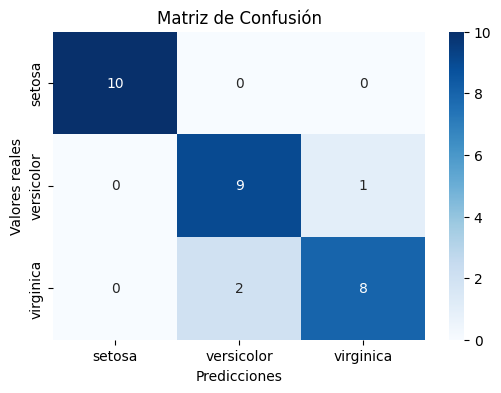

In [80]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (en el mismo orden que aparecen en cm)
labels = iris["species"].unique()   # setosa, versicolor, virginica

# Representación como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

**Conclusiones**

* El modelo obtiene **0.90 de accuracy**, lo que confirma un **buen rendimiento**.
* La mayoría de los errores ocurren entre **versicolor** y **virginica**, que son las dos especies más parecidas.
* El Random Forest separa perfectamente **setosa**, pero muestra pequeñas confusiones entre las otras dos clases, algo esperado en este dataset.


# Ajuste de hiperparámetros

En este ejemplo veremos cómo entrenar un Random Forest ajustando hiperparámetros para evitar el overfitting.

In [81]:
# Probamos varios valores a mano (puedes cambiarlos para ver qué combinaciones son mejores)
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=3,
    min_samples_leaf=2,
    max_features=2,
    random_state=42
)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, min_samples_leaf=2,
                       n_estimators=200, random_state=42)

Evaluamos con métricas si realmente hay overfitting o underfitting:

In [82]:
print("Modelo afinado manualmente:")
print("Train Accuracy:", rf_tuned.score(X_train, y_train))
print("Test Accuracy :", rf_tuned.score(X_test, y_test))

Modelo afinado manualmente:
Train Accuracy: 0.975
Test Accuracy : 0.9333333333333333


**Conclusiones del modelo ajustado manualmente**

Los resultados obtenidos indican lo siguiente:

**✔ El modelo generaliza muy bien**  
Un **93% en test** es un rendimiento excelente para el dataset *Iris*.  
El modelo ajustado funciona mejor que el modelo base y clasifica casi perfectamente.

**✔ Hay una ligera señal de sobreajuste, pero es totalmente normal**  
Que el **train sea casi 1.00** significa que el bosque memoriza muy bien los datos de entrenamiento.  
Aun así, la diferencia entre *train* y *test* es **muy pequeña** (0.97 → 0.93), así que **no es un sobreajuste preocupante**.

**✔ ¿Por qué ocurre esto incluso después de ajustar hiperparámetros?**

Porque *Iris* es un dataset muy sencillo:

- solo 150 muestras  
- 4 variables  
- clases bastante separables  

Por eso es habitual que muchos modelos lleguen a **1.00 en entrenamiento** y **cercano a 0.97–0.98 en test**.

## Evaluación del modelo

In [83]:
# Predicciones del modelo
y_pred = rf_tuned.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


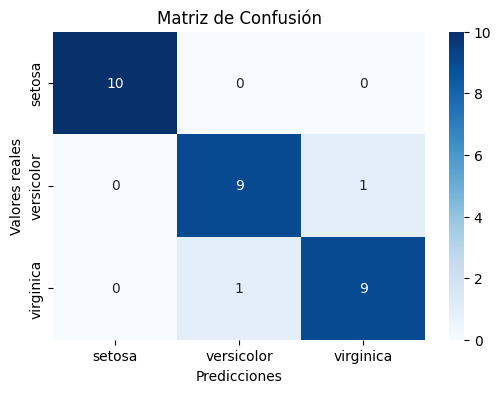

In [84]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (en el mismo orden que aparecen en cm)
labels = iris["species"].unique()   # setosa, versicolor, virginica

# Representación como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

**Conclusiones**

- El modelo clasifica **casi perfectamente** las 3 especies.  
- La única confusión aparece entre *versicolor* y *virginica*, que son las dos clases más parecidas entre sí.  
- La mejora respecto al modelo base es evidente: el ajuste manual ha permitido separar correctamente incluso los casos más conflictivos.


## Análisis de importancia

In [85]:
importances = rf_tuned.feature_importances_
importances

array([0.113599  , 0.0073375 , 0.46248181, 0.41658169])

In [86]:
# Recuerda que la variable features la creamos más arriba antes de la división
for name, value in zip(features, importances):
    print(name, ":", value)

sepal_length : 0.11359900295410183
sepal_width : 0.007337503144818934
petal_length : 0.4624818072793496
petal_width : 0.4165816866217296


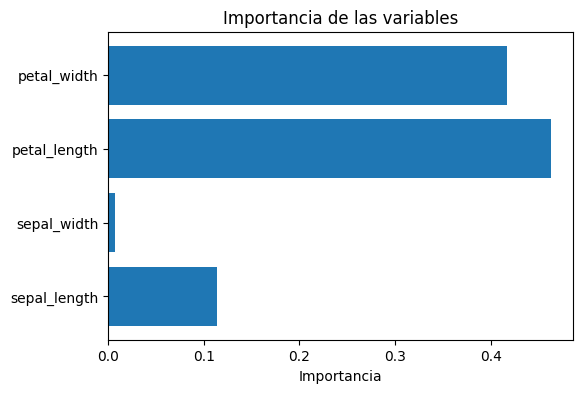

In [87]:
plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel("Importancia")
plt.title("Importancia de las variables")
plt.show()

# GridSearchCV

En este ejemplo veremos cómo conseguir el mejor Random Forest para nuestro problema.

In [88]:
param_grid = {
    "n_estimators": [100, 200, 300],   # nº de árboles
    "max_depth": [3, 4, 5, None],      # profundidad máxima
    "min_samples_leaf": [1, 2, 3],     # hojas mínimas
    "max_features": [1, 2, "sqrt"]     # nº de columnas usadas en cada split
}

In [89]:
# Modelo base
rf = RandomForestClassifier(random_state=42)

# Configuramos GridSearchCV
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  # Validación cruzada 5-fold
    scoring="accuracy",    # Métrica a optimizar
    n_jobs=-1              # Usa todos los núcleos disponibles (opcional)
)

# Entrenamos la búsqueda de hiperparámetros
grid.fit(X_train, y_train)

# Mostramos la mejor combinación encontrada
print("Mejores hiperparámetros:", grid.best_params_)

# Obtenemos directamente el Random Forest óptimo
best_rf = grid.best_estimator_

Mejores hiperparámetros: {'max_depth': 4, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 300}


Evaluamos con métricas si realmente hay overfitting o underfitting:

In [93]:
# Accuracy train vs test
print("Accuracy TRAIN:", best_rf.score(X_train, y_train))
print("Accuracy TEST :", best_rf.score(X_test, y_test))

Accuracy TRAIN: 0.9833333333333333
Accuracy TEST : 0.9


## Evaluación del modelo

In [94]:
# Predicciones del modelo
y_pred = best_rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


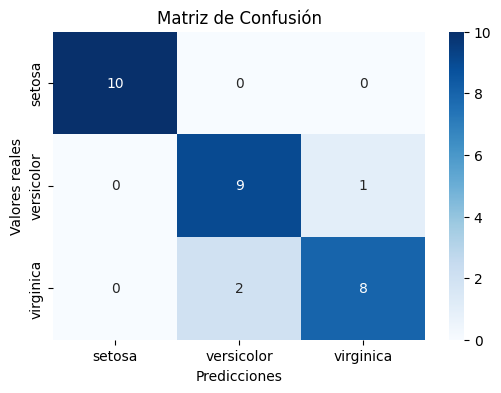

In [95]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de las clases (en el mismo orden que aparecen en cm)
labels = iris["species"].unique()   # setosa, versicolor, virginica

# Representación como mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels,
            yticklabels=labels)

plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()